<a href="https://colab.research.google.com/github/Soil-labs/Research-ML-knowledge-maping/blob/main/Equation_nodes_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

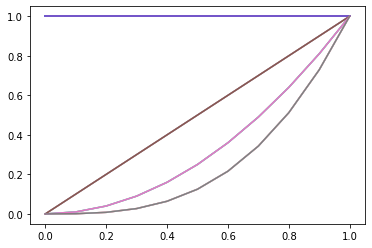

In [8]:
import matplotlib.pyplot as plt

# Set the range of values for "hop" and "weight"
hops = range(0, 4)
weights = [x / 10 for x in range(0, 11)]

# Create an empty list to store the values of "y" for each value of "hop"
y_values = [[] for _ in range(4)]

# Calculate the values of "y" for each combination of "hop" and "weight"
for hop in hops:
    for weight in weights:
        y = weight ** hop
        y_values[hop].append(y)

# Plot the graph
for hop, ys in enumerate(y_values):
    plt.plot(weights, ys)


plt.plot(weights, y_values[0], color='#0000FF')
plt.plot(weights, y_values[1], color='#6699FF')
plt.plot(weights, y_values[2], color='#99CCFF')
plt.plot(weights, y_values[3], color='#CCE5FF')

plt.plot(weights, y_values[0], label='hop = 0')
plt.plot(weights, y_values[1], label='hop = 1')
plt.plot(weights, y_values[2], label='hop = 2')
plt.plot(weights, y_values[3], label='hop = 3')

plt.show()


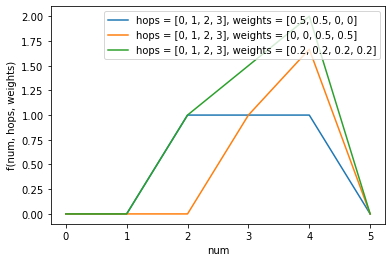

In [15]:
import matplotlib.pyplot as plt

def f(num, hops, weights):
  if num == 0:
    return 0
  if num > len(hops) or num > len(weights):
    return 0
  totalWeight = sum(weights[:num])
  if totalWeight == 0:
    return 0
  avgDistance = sum(hops[i] * weights[i] for i in range(num)) / totalWeight
  if avgDistance == 0:
    return 0 
  contributions = [hops[i] * weights[i] / avgDistance for i in range(num)]
  minContribution = min(contributions)
  maxContribution = max(contributions)
  return (sum(contributions) - minContribution) / (maxContribution - minContribution)

# Test the function for different values of num, hops, and weights
x = [0, 1, 2, 3, 4, 5]
y1 = [f(num, [0, 1, 2, 3], [0.5, 0.5, 0, 0]) for num in x]
y2 = [f(num, [0, 1, 2, 3], [0, 0, 0.5, 0.5]) for num in x]
y3 = [f(num, [0, 1, 2, 3], [0.2, 0.2, 0.2, 0.2]) for num in x]

# Plot the results
plt.plot(x, y1, label='hops = [0, 1, 2, 3], weights = [0.5, 0.5, 0, 0]')
plt.plot(x, y2, label='hops = [0, 1, 2, 3], weights = [0, 0, 0.5, 0.5]')
plt.plot(x, y3, label='hops = [0, 1, 2, 3], weights = [0.2, 0.2, 0.2, 0.2]')
plt.xlabel('num')
plt.ylabel('f(num, hops, weights)')
plt.legend()
plt.show()


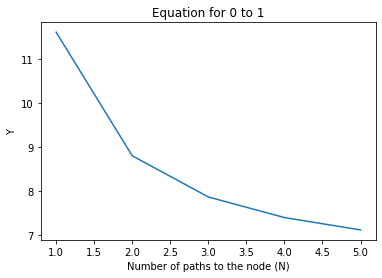

In [55]:
import matplotlib.pyplot as plt

def equation(N, hops, weights):
    Y = 0
    for i in range(len(hops)):
        Y += (1 - (1/N)) + (hops[i] * weights[i]) / N
        if hops[i] * weights[i] > 0.5:
            Y += 1 / N
    return Y

N_values = range(1, 6)
hops = [2, 1, 2, 3, 2, 1]
weights = [0.8, 0.6, 0.4, 0.2, 0.6, 0.8]

Y_values = []
for N in N_values:
    Y_values.append(equation(N, hops, weights))

plt.plot(N_values, Y_values)
plt.xlabel('Number of paths to the node (N)')
plt.ylabel('Y')
plt.title('Equation for 0 to 1')
plt.show()


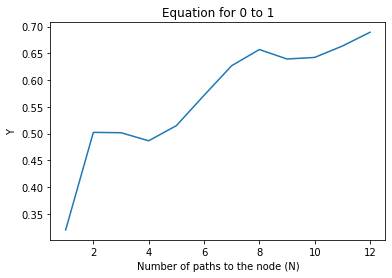

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def equation(N, hops, weights):

    # w1 = 0.5
    w1 = 0.5
    w2 = 0.5

    sumi = 0
    for i in range(N):
      sumi += weights[i]**hops[i]

    # print("sumi = ",sumi)
    # print("sumi/n = ",round(sumi/N,2))
    # print("(1 - (1/N)) = ",round((1 - (1/N**0.7)),2))

    Y = (1 - (1/(N**0.7)))*w1 + (sumi/ N)*w2
    # Y = (1 - (1/(N**0.7)))*w1
    return Y

N_values = range(1, 13)
hops = [2, 1, 2, 3, 2, 1,0,2,4,1,2,0,1]
weights = [0.8, 0.6, 0.4, 0.2, 0.6, 0.8,0.7,0.9,0.5,0.4,0.9,0.9,0.8]

Y_values = []
for N in N_values:
    Y_values.append(equation(N, hops, weights))

plt.plot(N_values, Y_values)
plt.xlabel('Number of paths to the node (N)')
plt.ylabel('Y')
plt.title('Equation for 0 to 1')
plt.show()
